Обучение модели с помощью CatBoostClassifier

In [4]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier

train_df = pd.read_csv('cleaned_train.csv')
valid_df = pd.read_csv('cleaned_valid.csv')
# train_df = pd.read_csv("../AC/trein.csv")
# valid_df = pd.read_csv("../AC/val.csv")

In [ ]:
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Получение важностей признаков из обученной модели
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,                      # Названия колонок из X_train
    'Importances': catboost_model.get_feature_importance()  # Важности признаков из CatBoost
})

# Сортировка признаков по важности
top_features = feature_importance.sort_values(by="Importances", ascending=False).head(20)

# Построение графика
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importances'], color='royalblue')
plt.gca().invert_yaxis()  # Инвертируем ось для наглядности
plt.title("Top-20 наиболее важных признаков (CatBoost)")
plt.xlabel("Важность признака")
plt.ylabel("Признаки (названия колонок)")
plt.show()

Инициализация и настройка модели XGBoost с подбором гиперпараметров

Построение ROC-кривой

ROC-AUC: 0.5753


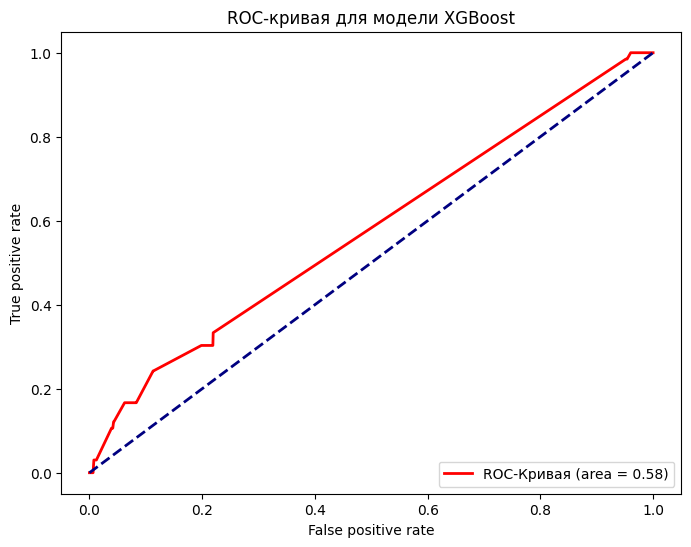

In [19]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Загрузка данных
train_df = pd.read_csv('train_edit.csv')
valid_df = pd.read_csv('valid_edit.csv')
# train_df = pd.read_csv("../AC/trein.csv")
# valid_df = pd.read_csv("../AC/val.csv")
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']

# Преобразование типов данных в числовые (int или float)
for col in X_train.columns:
    if X_train[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
        try:
            X_train[col] = pd.to_numeric(X_train[col])
        except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_train = X_train.drop(columns=[col])
           
for col in X_val.columns:
     if X_val[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
        try:
           X_val[col] = pd.to_numeric(X_val[col])
        except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_val = X_val.drop(columns=[col])

# Инициализация и настройка модели XGBoost с подбором гиперпараметров
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'max_depth': 1,
    'learning_rate': 0.3,
    'random_state': 1
}

# Обучение модели XGBoost
xgb_model = xgb.train(params, dtrain)

# Получение предсказаний вероятностей
y_prob = xgb_model.predict(dval)

# Расчет ROC-AUC
roc_auc = roc_auc_score(y_val, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-кривая для модели XGBoost')
plt.legend(loc='lower right')
plt.show()

ROC-AUC: 0.7018


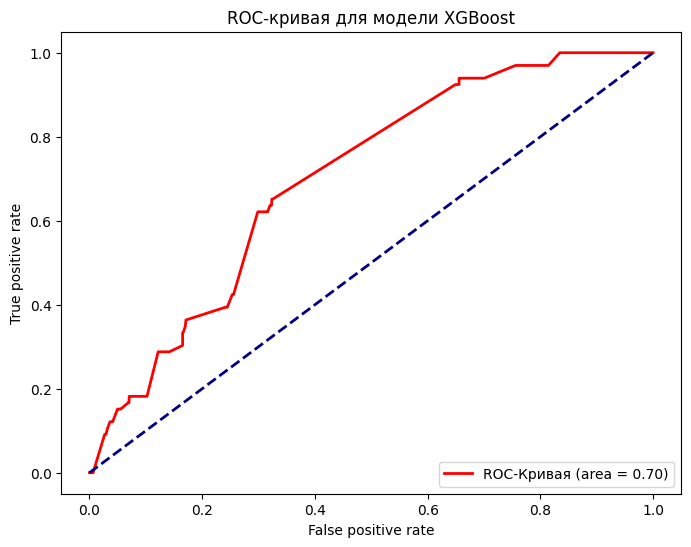

ROC-AUC: 0.6333


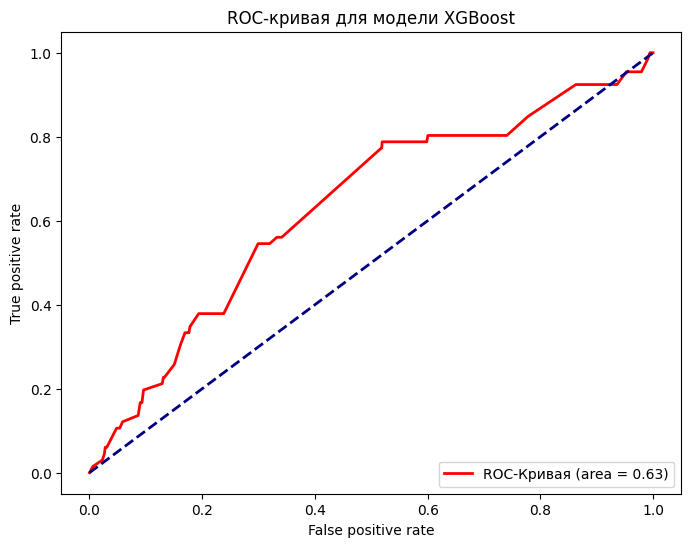

In [7]:
 import xgboost as xgb
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.metrics import roc_curve, roc_auc_score

 # Загрузка данных
 train_df = pd.read_csv('train_edit.csv')
 valid_df = pd.read_csv('valid_edit.csv')

 X_train = train_df.drop(columns=['target'])
 y_train = train_df['target']

 X_val = valid_df.drop(columns=['target'])
 y_val = valid_df['target']

 # Преобразование типов данных в числовые (int или float)
 for col in X_train.columns:
     if X_train[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
         try:
             X_train[col] = pd.to_numeric(X_train[col])
         except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_train = X_train.drop(columns=[col])
         
 for col in X_val.columns:
     if X_val[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
         try:
           X_val[col] = pd.to_numeric(X_val[col])
         except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_val = X_val.drop(columns=[col])

 # Инициализация и настройка модели XGBoost с подбором гиперпараметров
 dtrain = xgb.DMatrix(X_train, label=y_train)
 dval = xgb.DMatrix(X_val, label=y_val)

 # Рассчитываем количество элементов в каждом классе
 n_negative = y_train.value_counts()[0]
 n_positive = y_train.value_counts()[1]
 #Рассчитываем scale_pos_weight
 scale_pos_weight = n_negative / n_positive
  
 params = {
     'objective': 'binary:logistic',
     'max_depth': 1,
     'learning_rate': 0.3,
     'random_state': 1,
     'scale_pos_weight': scale_pos_weight  # добавляем scale_pos_weight
 }

 # Обучение модели XGBoost
 xgb_model = xgb.train(params, dtrain)

 # Получение предсказаний вероятностей
 y_prob = xgb_model.predict(dval)

 # Расчет ROC-AUC
 roc_auc = roc_auc_score(y_val, y_prob)
 print(f"ROC-AUC: {roc_auc:.4f}")

 # Построение ROC-кривой
 fpr, tpr, thresholds = roc_curve(y_val, y_prob)
 plt.figure(figsize=(8, 6))
 plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
 plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
 plt.xlabel('False positive rate')
 plt.ylabel('True positive rate')
 plt.title('ROC-кривая для модели XGBoost')
 plt.legend(loc='lower right')
 plt.show()



 import xgboost as xgb
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.metrics import roc_curve, roc_auc_score
 from imblearn.over_sampling import SMOTE


 # Загрузка данных
 train_df = pd.read_csv('train_edit.csv')
 valid_df = pd.read_csv('valid_edit.csv')
 # train_df = pd.read_csv("../AC/trein.csv")
 # valid_df = pd.read_csv("../AC/val.csv")
 X_train = train_df.drop(columns=['target'])
 y_train = train_df['target']

 X_val = valid_df.drop(columns=['target'])
 y_val = valid_df['target']

 # Преобразование типов данных в числовые (int или float)
 for col in X_train.columns:
     if X_train[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
         try:
             X_train[col] = pd.to_numeric(X_train[col])
         except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_train = X_train.drop(columns=[col])
         
 for col in X_val.columns:
     if X_val[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
         try:
           X_val[col] = pd.to_numeric(X_val[col])
         except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_val = X_val.drop(columns=[col])

 # Применяем SMOTE
 smote = SMOTE(random_state=42)
 X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

 # Инициализация и настройка модели XGBoost с подбором гиперпараметров
 dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled) # Заменяем X_train на X_train_resampled и y_train на y_train_resampled
 dval = xgb.DMatrix(X_val, label=y_val)

 params = {
     'objective': 'binary:logistic',
     'max_depth': 1,
     'learning_rate': 0.3,
     'random_state': 1
 }

 # Обучение модели XGBoost
 xgb_model = xgb.train(params, dtrain)

 # Получение предсказаний вероятностей
 y_prob = xgb_model.predict(dval)

 # Расчет ROC-AUC
 roc_auc = roc_auc_score(y_val, y_prob)
 print(f"ROC-AUC: {roc_auc:.4f}")

 # Построение ROC-кривой
 fpr, tpr, thresholds = roc_curve(y_val, y_prob)
 plt.figure(figsize=(8, 6))
 plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
 plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
 plt.xlabel('False positive rate')
 plt.ylabel('True positive rate')
 plt.title('ROC-кривая для модели XGBoost')
 plt.legend(loc='lower right')
 plt.show()

Accuracy: 0.9819
ROC AUC: 0.6502


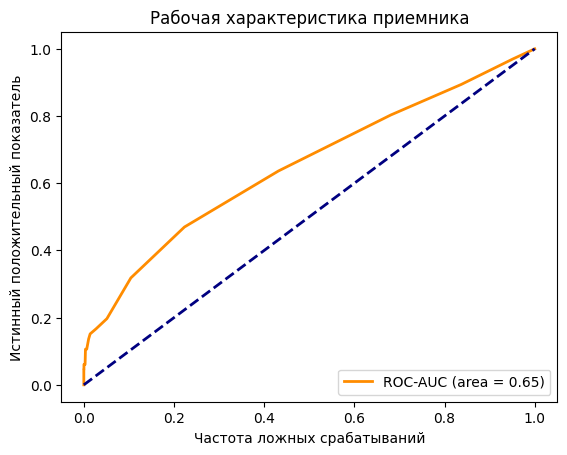

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score


# Загрузка данных
train_df = pd.read_csv('train_edit.csv')
valid_df = pd.read_csv('valid_edit.csv')
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']


# Преобразование типов данных в числовые (int или float)
for col in X_train.columns:
    if X_train[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
        try:
            X_train[col] = pd.to_numeric(X_train[col])
        except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_train = X_train.drop(columns=[col])
           
for col in X_val.columns:
     if X_val[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
        try:
           X_val[col] = pd.to_numeric(X_val[col])
        except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_val = X_val.drop(columns=[col])


# Инициализация и обучение модели
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Предсказание на валидационных данных
y_pred = model.predict(X_val)  # Исправлено: X_test -> X_val
accuracy = accuracy_score(y_val, y_pred) # Исправлено: y_test -> y_val

# Получение вероятностей для ROC-кривой
y_prob = model.predict_proba(X_val)[:, 1] # Исправлено: X_test -> X_val

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_val, y_prob) # Исправлено: y_test -> y_val
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Частота ложных срабатываний')
plt.ylabel('Истинный положительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc='lower right')
plt.show()

Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': None}
Best ROC AUC Score (Randomized Search): 0.9995
ROC AUC Fold 1: 0.9997
ROC AUC Fold 2: 0.9998
ROC AUC Fold 3: 0.9989
ROC AUC Fold 4: 0.9999
ROC AUC Fold 5: 0.9995
Average ROC AUC (Cross-Validation): 0.9995
Accuracy: 0.9819
ROC AUC (validation set): 0.6209


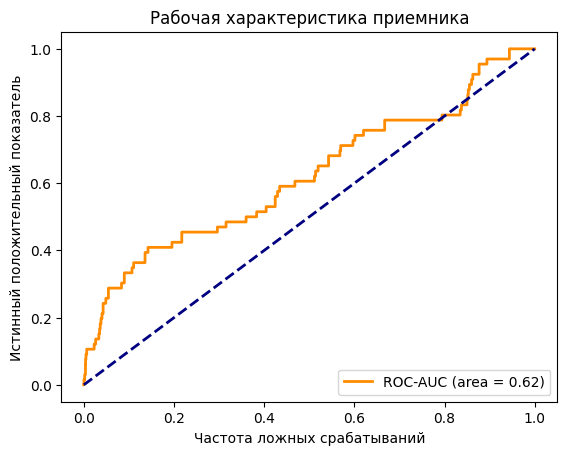

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np


# Загрузка данных
train_df = pd.read_csv('train_edit.csv')
valid_df = pd.read_csv('valid_edit.csv')

# --- Создание дисбаланса (уменьшение миноритарного класса) ---
minority_class_label = 1
minority_class_df = train_df[train_df['target'] == minority_class_label]
majority_class_df = train_df[train_df['target'] != minority_class_label]

desired_minority_size = int(len(minority_class_df) * 0.5)
disbalanced_minority_class_df = minority_class_df.sample(n=desired_minority_size, random_state=42)
disbalanced_train_df = pd.concat([disbalanced_minority_class_df, majority_class_df], axis=0)

X_train = disbalanced_train_df.drop(columns=['target'])
y_train = disbalanced_train_df['target']
# --- Конец секции дисбаланса ---

X_val = valid_df.drop(columns=['target'])
y_val = valid_df['target']


# Преобразование типов данных в числовые (int или float)
for col in X_train.columns:
    if X_train[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
        try:
            X_train[col] = pd.to_numeric(X_train[col])
        except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_train = X_train.drop(columns=[col])
           
for col in X_val.columns:
     if X_val[col].dtype not in ['int64', 'float64', 'int32', 'float32']:
        try:
           X_val[col] = pd.to_numeric(X_val[col])
        except ValueError:
           print(f"Не удалось преобразовать столбец {col}, возможно не числовой")
           X_val = X_val.drop(columns=[col])

# --- Обработка дисбаланса с SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

'''
SMOTE генерирует новые синтетические данные только для тренировочного набора данных.'''

# --- Гиперпараметрическая оптимизация с RandomizedSearchCV ---

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train_resampled, y_train_resampled)
best_params = rf_random.best_params_
best_model = rf_random.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best ROC AUC Score (Randomized Search): {rf_random.best_score_:.4f}")

'''Этот блок кода выполняет поиск лучших гиперпараметров для модели RandomForestClassifier, используя RandomizedSearchCV.
Он перебирает различные комбинации гиперпараметров, обучает модели, оценивает их качество на основе кросс-валидации и метрики ROC AUC,
и в результате предоставляет лучшую комбинацию гиперпараметров и лучшую модель.
'''

# --- Кросс-валидация на лучших параметрах ---
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
roc_auc_scores = []
for fold, (train_index, val_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]
    
    model = RandomForestClassifier(**best_params, random_state=42) # используем лучшие параметры
    model.fit(X_train_fold, y_train_fold)
    
    y_prob_fold = model.predict_proba(X_val_fold)[:, 1]
    roc_auc_fold = roc_auc_score(y_val_fold, y_prob_fold)
    roc_auc_scores.append(roc_auc_fold)
    print(f'ROC AUC Fold {fold+1}: {roc_auc_fold:.4f}')

print(f'Average ROC AUC (Cross-Validation): {np.mean(roc_auc_scores):.4f}')

'''
Этот блок кода выполняет кросс-валидацию модели случайного леса с использованием StratifiedKFold, вычисляет ROC AUC на каждом фолде и 
выводит среднее значение ROC AUC для всех фолдов. StratifiedKFold обеспечивает,
что распределение классов в каждом фолде будет таким же, как в исходных данных, и перемешивание (shuffle=True) гарантирует, что нет зависимости от порядка данных.
# --- Оценка модели на отложенной валидации ---
'''
# Предсказание на валидационных данных
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Получение вероятностей для ROC-кривой
y_prob = best_model.predict_proba(X_val)[:, 1]

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC (validation set): {roc_auc:.4f}")


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Частота ложных срабатываний')
plt.ylabel('Истинный положительный показатель')
plt.title('Рабочая характеристика приемника')
plt.legend(loc='lower right')
plt.show()